In [731]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [732]:
df = pd.read_csv('data/train.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [733]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin','Ticket']]#'Name',
y = df['Survived']
X.shape,y.shape

((891, 9), (891,))

In [734]:
X['Alone'] = np.where((X['Parch']<1) & (X['SibSp']<1),1,0)
X['Alone'].value_counts()

/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_33323/2751445116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Alone'] = np.where((X['Parch']<1) & (X['SibSp']<1),1,0)


1    537
0    354
Name: Alone, dtype: int64

In [735]:
X['Cabin'].fillna("Unknown",inplace=True)

/Users/maria/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [736]:
X['Cabin_A']=np.where(X['Cabin'].str.contains('A'),1,0)
X['Cabin_B']=np.where(X['Cabin'].str.contains('B'),1,0)
X['Cabin_C']=np.where(X['Cabin'].str.contains('C'),1,0)
X['Cabin_D']=np.where(X['Cabin'].str.contains('D'),1,0)
X['Cabin_E']=np.where(X['Cabin'].str.contains('E'),1,0)
X['Cabin_F']=np.where(X['Cabin'].str.contains('F'),1,0)
X['Cabin_G']=np.where(X['Cabin'].str.contains('G'),1,0)

/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_33323/2836540753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cabin_A']=np.where(X['Cabin'].str.contains('A'),1,0)


In [737]:
#We could do something similar with names but they are too divergent.


In [738]:
X.drop('Cabin', axis=1, inplace=True)

In [739]:
X['Ticket_frequency'] = X['Ticket'].map(X['Ticket'].value_counts())

In [740]:
X.drop('Ticket', axis=1, inplace=True)

In [741]:
X.corrwith(y) 

Pclass             -0.338481
Age                -0.077221
SibSp              -0.035322
Parch               0.081629
Fare                0.257307
Alone              -0.203367
Cabin_A             0.022287
Cabin_B             0.175095
Cabin_C             0.114652
Cabin_D             0.150716
Cabin_E             0.150716
Cabin_F             0.057935
Cabin_G            -0.017955
Ticket_frequency    0.038247
dtype: float64

In [742]:
# The most correlated are: Pclass, Fare, Alone and some cabins. To make age more relevant we create new column

<AxesSubplot:xlabel='Age', ylabel='Density'>

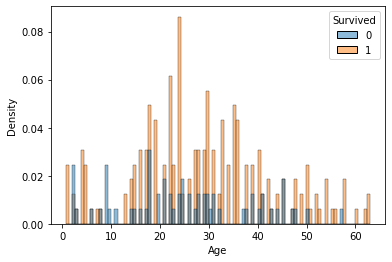

In [743]:
sns.histplot(data=X[X['Sex']=='female'], x="Age", hue = y,stat="density",bins=100)

<AxesSubplot:xlabel='Age', ylabel='Density'>

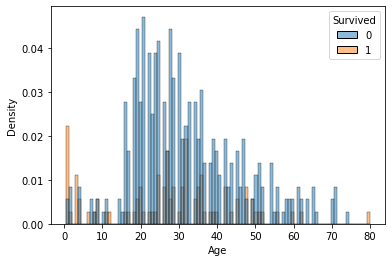

In [744]:
sns.histplot(data=X[X['Sex']=='male'], x="Age", hue = y,stat="density",bins=100)

In [745]:
X['Young_male'] = np.where((X['Sex']=='male') & (X['Age']<12.0),1,0) #Age seem more important for male passingers 
X['Young_male'].value_counts()

0    855
1     36
Name: Young_male, dtype: int64

In [746]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #

In [747]:
X_train.shape,y_train.shape

((712, 17), (712,))

In [748]:
X_test.shape,y_test.shape

((179, 17), (179,))

In [749]:
numerical_columns = ['Age','Fare',]
categorical_columns = ['Embarked','Pclass','Sex','SibSp','Parch','Alone'] #

In [750]:
numerical_pipeline = Pipeline([
    ('numerical_imputer',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('num_scaler',StandardScaler()),
    ('num_discritazer',KBinsDiscretizer(n_bins=10, strategy='uniform'),)
])

In [751]:
categorical_pipeline = Pipeline([
    ('categorical_imputer',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('categorical_ohe',OneHotEncoder(sparse=False, handle_unknown='error',drop='first')),
])

In [752]:
column_transformer = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,['Age','Fare',]),
    ('categorical_pipeline',categorical_pipeline,['Embarked','Pclass','Sex','Alone','SibSp','Parch','Ticket_frequency',]),#
],remainder="passthrough")

In [753]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Alone',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Ticket_frequency', 'Young_male'],
      dtype='object')

In [754]:
column_transformer.fit(X_train) #learn how to do the transforamtion
X_train_fe = column_transformer.transform(X_train) #Do the accual transformation
X_test_fe = column_transformer.transform(X_test) #Do the same transformation on test set 

In [755]:
m = LogisticRegression() #class_weight='balanced'
m.fit(X_train_fe,y_train) 

LogisticRegression()

In [756]:
scores = cross_val_score(m, X_train_fe, y_train, cv=10)
np.sort(scores.round(3))

array([0.761, 0.789, 0.789, 0.789, 0.803, 0.803, 0.817, 0.819, 0.873,
       0.889])

In [757]:
f"Mean cross-validation score: {scores.mean(): 5.3f}"

'Mean cross-validation score:  0.813'

In [758]:
y_pred = m.predict(X_test_fe)

In [759]:
score =accuracy_score(y_test,y_pred) 
score

0.8212290502793296